In [13]:
import pandas as pd
import os
import json
import csv
import re
import matplotlib.pyplot as plt

### Add hallucinations notes to scores.csv

In [18]:
dict = {"oui":[1,2,3], "non":[3,4,5]}
df = pd.DataFrame(dict)
df["peut-être"] = [6,7,8]

print(df)

   oui  non  peut-être
0    1    3          6
1    2    4          7
2    3    5          8


Revoir un peu le script

In [32]:
nb_batch = "1"
hallucinations_path = "results/" + nb_batch + "/hallucinations.txt"
scores_path = "results/" + nb_batch + "/scores.csv"
hallucinations_file = open(hallucinations_path, 'r', encoding= 'utf-8')
hallucinations = hallucinations_file.readlines()
hallucinations_file.close()
scores = pd.read_csv(scores_path)
print(len(scores))
print(len(hallucinations))
scores["hallucination"] = hallucinations

scores.to_csv("test.csv", encoding='utf-8')

40
40


In [26]:
file = open("tester.txt", 'r', encoding='utf-8')
s = file.read()
print(s)

Ceci est un trimestre
J'espère que ça marche


### Fill scores.csv (now useless)

In [9]:
df1 = pd.read_csv("results/4/scores1.csv")
df = pd.read_csv("results/4/scores.csv")

df1["consistency"] = df["consistency"]
df1["description"] = df["description"]

df1.to_csv('scores.csv', encoding='utf-8')

#for i in range(len(df)):
#    row = df.iloc[i]
#    file = open("results/4/" + row["input_path"], 'r', encoding='utf-8')
#    data = json.load(file)
#    file.close()
#    words = re.findall(r'\b\w+\b', data["text"])  # Find all word-like sequences using regular expression
#    row["nb_words_generated"] = len(words)

#df.to_csv('scores.csv', encoding='utf-8')
    

### Fill scores.csv (now useless)

In [9]:
consistency_list = [1]*41
description_list = [-1]*41
specificities_consistency = {0:0, 2:0, 8:0, 9:0, 11:0, 13:0, 17:0, 19:0, 21:0, 25:0, 27:0, 28:0, 30:0, 37:0, 38:0, 39:0}
specificities_description = {0:"chinese", 2:"chinese", 5:"Key points per utterance", 8:"chinese", 9:"Repeats the conversation", 11:"chinese", 13:"full chinese text", 17:"full chinese text", 19:"full chinese text", 21:"full chinese text", 25:"full chinese text", 27:"full chinese text", 28:"takes back the discourse", 30:"takes back the discourse", 37:"full chinese text", 38:"Sort 2 mots", 39:"full chinese text"}

for key in specificities_consistency.keys():
    consistency_list[key] = specificities_consistency[key]
for key in specificities_description.keys():
    description_list[key] = specificities_description[key]

path_scores_file = "results/" + "2" + "/scores.csv"
dfFINAL = pd.read_csv(path_scores_file)
dfFINAL["consistency"] = consistency_list
dfFINAL["description"] = description_list
dfFINAL.to_csv('scores.csv', encoding='utf-8')
#nb_batch = "1"
#path_scoresINIT_file = "results/" + nb_batch + "/scores.csv"
#path_scoresFINAL_file = "results/" + nb_batch + "/scores4.csv"
#dfFINAL = pd.read_csv(path_scoresFINAL_file)
#dfINIT = pd.read_csv(path_scoresINIT_file)
#dfFINAL["consistency"] = dfINIT["consistency"]
#dfFINAL["description"] = dfINIT["description"]
#dfFINAL.to_csv('scores.csv', encoding='utf-8')

In [2]:
consistency_list = [1]*25
description_list = [-1]*25
specificities_consistency = {3:0, 4:0, 9:0, 10:0, 12:0, 15:0, 16:0, 17:0, 19:0, 20:0, 23:0, 24:0}
specificities_description = {2:"Too long, takes back the text but with hallucinations", 3:"Repeats the text", 4:"Repeats the text", 5:"Très bon résumé", 6:"Statement en une ligne du modèle, pas compris l'instruction et dit n'imp", 7:"Beaucoup trop court, trop incomplet", 8:"Une phrase répétée 2 fois", 9:"Répétitions du texte", 10:"Répétitions du texte", 15:"Répétitions du texte", 12:"Répétitions du texte", 16:"Répétitions du texte", 17:"Répétitions du texte", 19:"Répétitions du texte", 20:"Répétitions du texte", 23:"Répétitions du texte", 24:"Répétitions du texte"}

for key in specificities_consistency.keys():
    consistency_list[key] = specificities_consistency[key]
for key in specificities_description.keys():
    description_list[key] = specificities_description[key]

path_scores_file = "results/" + "3" + "/scores.csv"
dfFINAL = pd.read_csv(path_scores_file)
dfFINAL["consistency"] = consistency_list
dfFINAL["description"] = description_list
dfFINAL.to_csv('scores.csv', encoding='utf-8')

### ANALYSE Français / Anglais

In [3]:

batches = {'0', '1', '2'}

for nb_batch in batches:
    name_file = "results/" + nb_batch + "/desc.txt"
    file = open(name_file, 'r', encoding='utf-8')
    description = file.readline()
    print("Batch " + nb_batch + ": " + description)
    # Je souhaite obtenir le dataset des samples cohérents -> filtrage
    path_scores_file = "results/" + nb_batch + "/scores.csv"
    # Extract consistency and description
    df = pd.read_csv(path_scores_file)
    df = df[df["success"]==1]
    array = df.values

    consistent_df = df[df["consistency"]==1]
    unconsistent_df = df[df["consistency"]==0] # Rajouter qui est unconsistent
    

    consistent_df_en = consistent_df[consistent_df["output_language"]==1]
    consistent_df_en_en = consistent_df_en[consistent_df_en["input_language"]==1]

    consistent_df_en_fr = consistent_df_en[consistent_df_en["input_language"]==0] # Réponses anglaises à une question française

    consistent_df_fr = consistent_df[consistent_df["output_language"]==0]
    consistent_df_fr_fr = consistent_df_fr[consistent_df_fr["input_language"]==0]

    print("Le batch " + nb_batch + " contient " + str(len(consistent_df)) + "/" + str(len(df)) + " échantillons cohérents.")
    print("Parmi les échantillons incohérents, " + str(len(unconsistent_df[unconsistent_df["input_language"]==0])) + "/" + str(len(unconsistent_df)) + " correspondent à une question française")
    print("Parmi les réponses écrites en français, " + str(len(consistent_df_fr_fr)) + "/" + str(len(consistent_df_fr)) + " des questions sont écrites en français")
    print("Parmi les réponses écrites en anglais, " + str(len(consistent_df_en_en)) + "/" + str(len(consistent_df_en)) + " des questions sont écrites en anglais")
    print()

    rouge2_en_fr = consistent_df_en_fr['rouge2'].mean()
    rougel_en_fr = consistent_df_en_fr['rougel'].mean()
    bert_en_fr = consistent_df_en_fr['bertscore'].mean()

    rouge2_fr_fr = consistent_df_fr_fr['rouge2'].mean()
    rougel_fr_fr = consistent_df_fr_fr['rougel'].mean()
    bert_fr_fr = consistent_df_fr_fr['bertscore'].mean()

    rouge2_en_en = consistent_df_en_en['rouge2'].mean()
    rougel_en_en = consistent_df_en_en['rougel'].mean()
    bert_en_en = consistent_df_en_en['bertscore'].mean()

    print("Moyennes questions françaises, réponses françaises (" + str(len(consistent_df_fr_fr)) + " échantillons):")
    print("Rouge 2: " + str(round(rouge2_fr_fr, 3)) + " +/- " + str(round(consistent_df_fr_fr['rouge2'].std(), 3)) +" ---- Rouge L: " + str(round(rougel_fr_fr, 3))+ " +/- " + str(round(consistent_df_fr_fr['rougel'].std(), 3)) + " ---- BertScore: " + str(round(bert_fr_fr, 3)) + " +/- " + str(round(consistent_df_fr_fr['bertscore'].std(), 3)))
    print()
    print("Moyennes questions anglaises, réponses anglaises (" + str(len(consistent_df_en_en)) + " échantillons):")
    print("Rouge 2: " + str(round(rouge2_en_en, 3)) + " +/- " + str(round(consistent_df_en_en['rouge2'].std(), 3)) + " ---- Rouge L: " + str(round(rougel_en_en, 3)) + " +/- " + str(round(consistent_df_en_en['rougel'].std(), 3)) + " ---- BertScore: " + str(round(bert_en_en, 3)) + " +/- " + str(round(consistent_df_en_en['rouge2'].std(), 3)))
    print()
    print("Moyennes questions françaises, réponses anglaises (" + str(len(consistent_df_en_fr)) + " échantillons):")
    s = "Rouge 2: " + str(round(rouge2_en_fr, 3)) + " +/- " + str(round(consistent_df_en_fr['rouge2'].std(), 3)) + " ---- Rouge L: " + str(round(rougel_en_fr, 3)) + " +/- " + str(round(consistent_df_en_fr['rougel'].std(), 3)) + " ---- BertScore: " + str(round(bert_en_fr, 3)) + " +/- " + str(round(consistent_df_en_fr['bertscore'].std(), 3))
    print(s)
    print()

    consistent_df_en_en["compression_rate"] = consistent_df_en_en["nb_words_generated"] / consistent_df_en_en["nb_words_input"]
    consistent_df_en_fr["compression_rate"] = consistent_df_en_fr["nb_words_generated"] / consistent_df_en_fr["nb_words_input"]
    consistent_df_fr_fr["compression_rate"] = consistent_df_fr_fr["nb_words_generated"] / consistent_df_fr_fr["nb_words_input"]
    compression_rate_en_en = consistent_df_en_en["compression_rate"].mean()
    compression_rate_en_fr = consistent_df_en_fr["compression_rate"].mean()
    compression_rate_fr_fr = consistent_df_fr_fr["compression_rate"].mean()

    print("Taux de compression questions anglaises réponses anglaises: " + str(round(compression_rate_en_en, 3)) + " +/- " + str(round(consistent_df_en_en["compression_rate"].std(), 3)))
    print("Taux de compression questions françaises réponses anglaises: " + str(round(compression_rate_en_fr, 3)) + " +/- " + str(round(consistent_df_en_fr["compression_rate"].std(), 3)))
    print("Taux de compression questions françaises réponses françaises: " + str(round(compression_rate_fr_fr, 3)) + " +/- " + str(round(consistent_df_fr_fr["compression_rate"].std(), 3)))
    print()
    print("Moyenne du nombre de mots générés pour réponses anglaises questions anglaises :" + str(round(consistent_df_en_en["nb_words_generated"].mean(), 3)) + " +/- " + str(round(consistent_df_en_en["nb_words_generated"].std(), 3)))
    print("Moyenne du nombre de mots générés pour réponses anglaises questions françaises :" + str(round(consistent_df_en_fr["nb_words_generated"].mean(), 3)) + " +/- " + str(round(consistent_df_en_fr["nb_words_generated"].std(), 3)))


    print()
    print()
    # Grosse tendance à écrire en anglais. Et c'est normal, le header de finetuning est en anglais... Les tâches de finetuning ne sont pas multilingues !
    # Du coup, problème lors du calcul des scores: calculs sur du gold fr et du generated en. De plus, problème plus général sur les métriques, un bertscore français est différent d'un bertscore anglais, pas comparable et la moyenne du rouge score entre deux textes randoms en langue anglais et française est probablement différente... Limites de ces mesures. Justifie l'analyse qualitative.


Batch 0: This inference batch is aimed at testing this code. It helped debugging. it was performed with a 4bit quantized version of XGen 7B. One take away is that for 4 out of the 5 fredsum texts, there was too many tokens (above 1800)
Le batch 0 contient 28/36 échantillons cohérents.
Parmi les échantillons incohérents, 4/8 correspondent à une question française
Parmi les réponses écrites en français, 1/1 des questions sont écrites en français
Parmi les réponses écrites en anglais, 16/27 des questions sont écrites en anglais

Moyennes questions françaises, réponses françaises (1 échantillons):
Rouge 2: 0.057 +/- nan ---- Rouge L: 0.09 +/- nan ---- BertScore: -0.064 +/- nan

Moyennes questions anglaises, réponses anglaises (16 échantillons):
Rouge 2: 0.103 +/- 0.056 ---- Rouge L: 0.191 +/- 0.049 ---- BertScore: 0.24 +/- 0.056

Moyennes questions françaises, réponses anglaises (11 échantillons):
Rouge 2: 0.063 +/- 0.034 ---- Rouge L: 0.137 +/- 0.059 ---- BertScore: 0.163 +/- 0.125

Taux 

C:\Users\rayci\AppData\Local\Temp\ipykernel_58520\2247821553.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistent_df_en_en["compression_rate"] = consistent_df_en_en["nb_words_generated"] / consistent_df_en_en["nb_words_input"]
C:\Users\rayci\AppData\Local\Temp\ipykernel_58520\2247821553.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistent_df_en_fr["compression_rate"] = consistent_df_en_fr["nb_words_generated"] / consistent_df_en_fr["nb_words_input"]
C:\Users\rayci\AppData\Local\Temp\ip

In [8]:
7/4

1.75

### evaluation globale

In [44]:
corpora = {'dialogsum', 'fredsum', 'mediasum', 'xsum', 'samsum'}
scores = {'rouge2', 'rougel', 'bertscore'}
def identify_datasets(s):
    for corpus in corpora:
        if s.find(corpus)!=-1:
            return corpus
    return None

batches = {'0', '1', '2', '3', '4'}


folder_dataset = "datasets/LanguageTestDataSet"
avg_nb_words_gold = 0
tot = 0
for corpus in corpora:
    folder_corpus = folder_dataset + "/" + corpus
    for name_file in os.listdir(folder_corpus):
        tot += 1
        file = open(folder_corpus + "/" + name_file, 'r', encoding='utf-8')
        data = json.load(file)
        file.close()
        a = 0
        for i in range(len(data["summaries"])):
            a += int(data["summaries"][i]["nb_words_en"])
        a /= len(data["summaries"])

        avg_nb_words_gold += a
avg_nb_words_gold = avg_nb_words_gold/tot
path_scores_fil = "results/3/scores.csv"
df = pd.read_csv(path_scores_fil)

print("Nombre moyen de mots dans les résumés gold sur les 5 corpus: " + str(round(avg_nb_words_gold, 3)))

print()
print()
for nb_batch in batches:
    print("===== Batch n°" + nb_batch + " =====")
    name_file = "results/" + nb_batch + "/desc.txt"
    file = open(name_file, 'r', encoding='utf-8')
    description = file.readline()
    print(description)
    print()
    # Je souhaite obtenir le dataset des samples cohérents -> filtrage
    path_scores_file = "results/" + nb_batch + "/scores.csv"
    # Extract english data
    df = pd.read_csv(path_scores_file)
    df = df[df["input_language"] == 1] # We extract English only
    array = df.values
    # Consistency information
    consistent_df = df[df["consistency"]==1]
    print("--- Cohérence ---")
    print("Nombre de réponses cohérentes: " + str(len(consistent_df)) + "/" + str(len(df)))
    print("Par dataset:                       (cela comprend aussi les générations qui ont échoué, notamment avec fredsum sur XGen)")
    per_corpus = {}
    consistent_per_corpus = {}
    for corpus in corpora:
        per_corpus[corpus] = df[df["dataset"]==corpus]
        consistent_per_corpus[corpus] = consistent_df[consistent_df["dataset"]==corpus]
        print("  * " + corpus + " : " + str(len(consistent_per_corpus[corpus])) + "/" + str(len(per_corpus[corpus])) + " réponses cohérentes.")
    print()
    print("--- Métriques ---")
    print("Moyenne des métriques sur les données cohérentes:")
    for score in scores:
        print(" - " + score + " : " + str(round(consistent_df[score].mean(), 3)) + " +/- " + str(round(consistent_df[score].std(), 3))  +"      (moyenne sur toutes les données: " + str(round(df[score].mean(), 3)) + " +/- " + str(round(df[score].std(), 3)) +")" )
    avg_nb = 0
    tot = 0
    for corpus in corpora:
        tot += len(consistent_per_corpus[corpus]["nb_words_generated"])
        avg_nb += consistent_per_corpus[corpus]["nb_words_generated"].mean() * len(consistent_per_corpus[corpus]["nb_words_generated"])
    avg_nb = avg_nb / tot
    print("Nombre moyen de mots générés: " + str(round(avg_nb, 3)))
    print()
    print("Par corpus:")
    for corpus in corpora:
        print("  *** " + corpus + " ***")
        for score in scores:
            print(" - " + score + " : " +str(round(consistent_per_corpus[corpus][score].mean(), 3)) + " +/- " + str(round(per_corpus[corpus][score].std(), 3)) + "       (moyenne sur " + str(len(consistent_per_corpus[corpus])) + "/" + str(len(per_corpus[corpus])) + " échantillons)")
        print("   Taux de compression moyen sur le corpus: " + str(round(consistent_per_corpus[corpus]["nb_words_generated"].mean()/consistent_per_corpus[corpus]["nb_words_input"].mean(), 3)) + " +/- " + str(round((consistent_per_corpus[corpus]["nb_words_generated"]/consistent_per_corpus[corpus]["nb_words_input"]).std(), 3)) + "       Rapport moyen taille du gold sur taille du généré: " + str(round((consistent_per_corpus[corpus]["nb_words_gold"]/consistent_per_corpus[corpus]["nb_words_generated"]).mean(), 3)) + " +/- " + str(round((consistent_per_corpus[corpus]["nb_words_gold"]/consistent_per_corpus[corpus]["nb_words_generated"]).std(), 3)))
        print("   Nombre moyen de mots === Texte : " + str(round(consistent_per_corpus[corpus]["nb_words_input"].mean(), 3)) + " +/- " + str(round(consistent_per_corpus[corpus]["nb_words_input"].std(), 3)) + " === Gold : " + str(round(consistent_per_corpus[corpus]["nb_words_gold"].mean(), 3)) + " +/- " + str(round(consistent_per_corpus[corpus]["nb_words_gold"].std(), 3)) + " === Généré : " + str(round(consistent_per_corpus[corpus]["nb_words_generated"].mean() ,3)) + " +/- " + str(round(consistent_per_corpus[corpus]["nb_words_generated"].std() ,3)))
        print()
    print()
    if nb_batch == "2":
        dfdf = consistent_df[consistent_df["dataset"]=="dialogsum"]
        print(dfdf["rouge2"])
        print(dfdf["rougel"])
        print(dfdf["bertscore"])


Nombre moyen de mots dans les résumés gold sur les 5 corpus: 58.353


===== Batch n°4 =====
This inference batch is aimed at testing Llama 2 chat on summarization. There is no French summarization at all.

--- Cohérence ---
Nombre de réponses cohérentes: 22/25
Par dataset:                       (cela comprend aussi les générations qui ont échoué, notamment avec fredsum sur XGen)
  * dialogsum : 3/5 réponses cohérentes.
  * samsum : 4/5 réponses cohérentes.
  * mediasum : 5/5 réponses cohérentes.
  * xsum : 5/5 réponses cohérentes.
  * fredsum : 5/5 réponses cohérentes.

--- Métriques ---
Moyenne des métriques sur les données cohérentes:
 - rouge2 : 0.097 +/- 0.065      (moyenne sur toutes les données: 0.093 +/- 0.062)
 - bertscore : 0.228 +/- 0.109      (moyenne sur toutes les données: 0.218 +/- 0.106)
 - rougel : 0.183 +/- 0.069      (moyenne sur toutes les données: 0.18 +/- 0.066)
Nombre moyen de mots générés: 235.364

Par corpus:
  *** dialogsum ***
 - rouge2 : 0.159 +/- 0.096      

### Link between scores and lengths

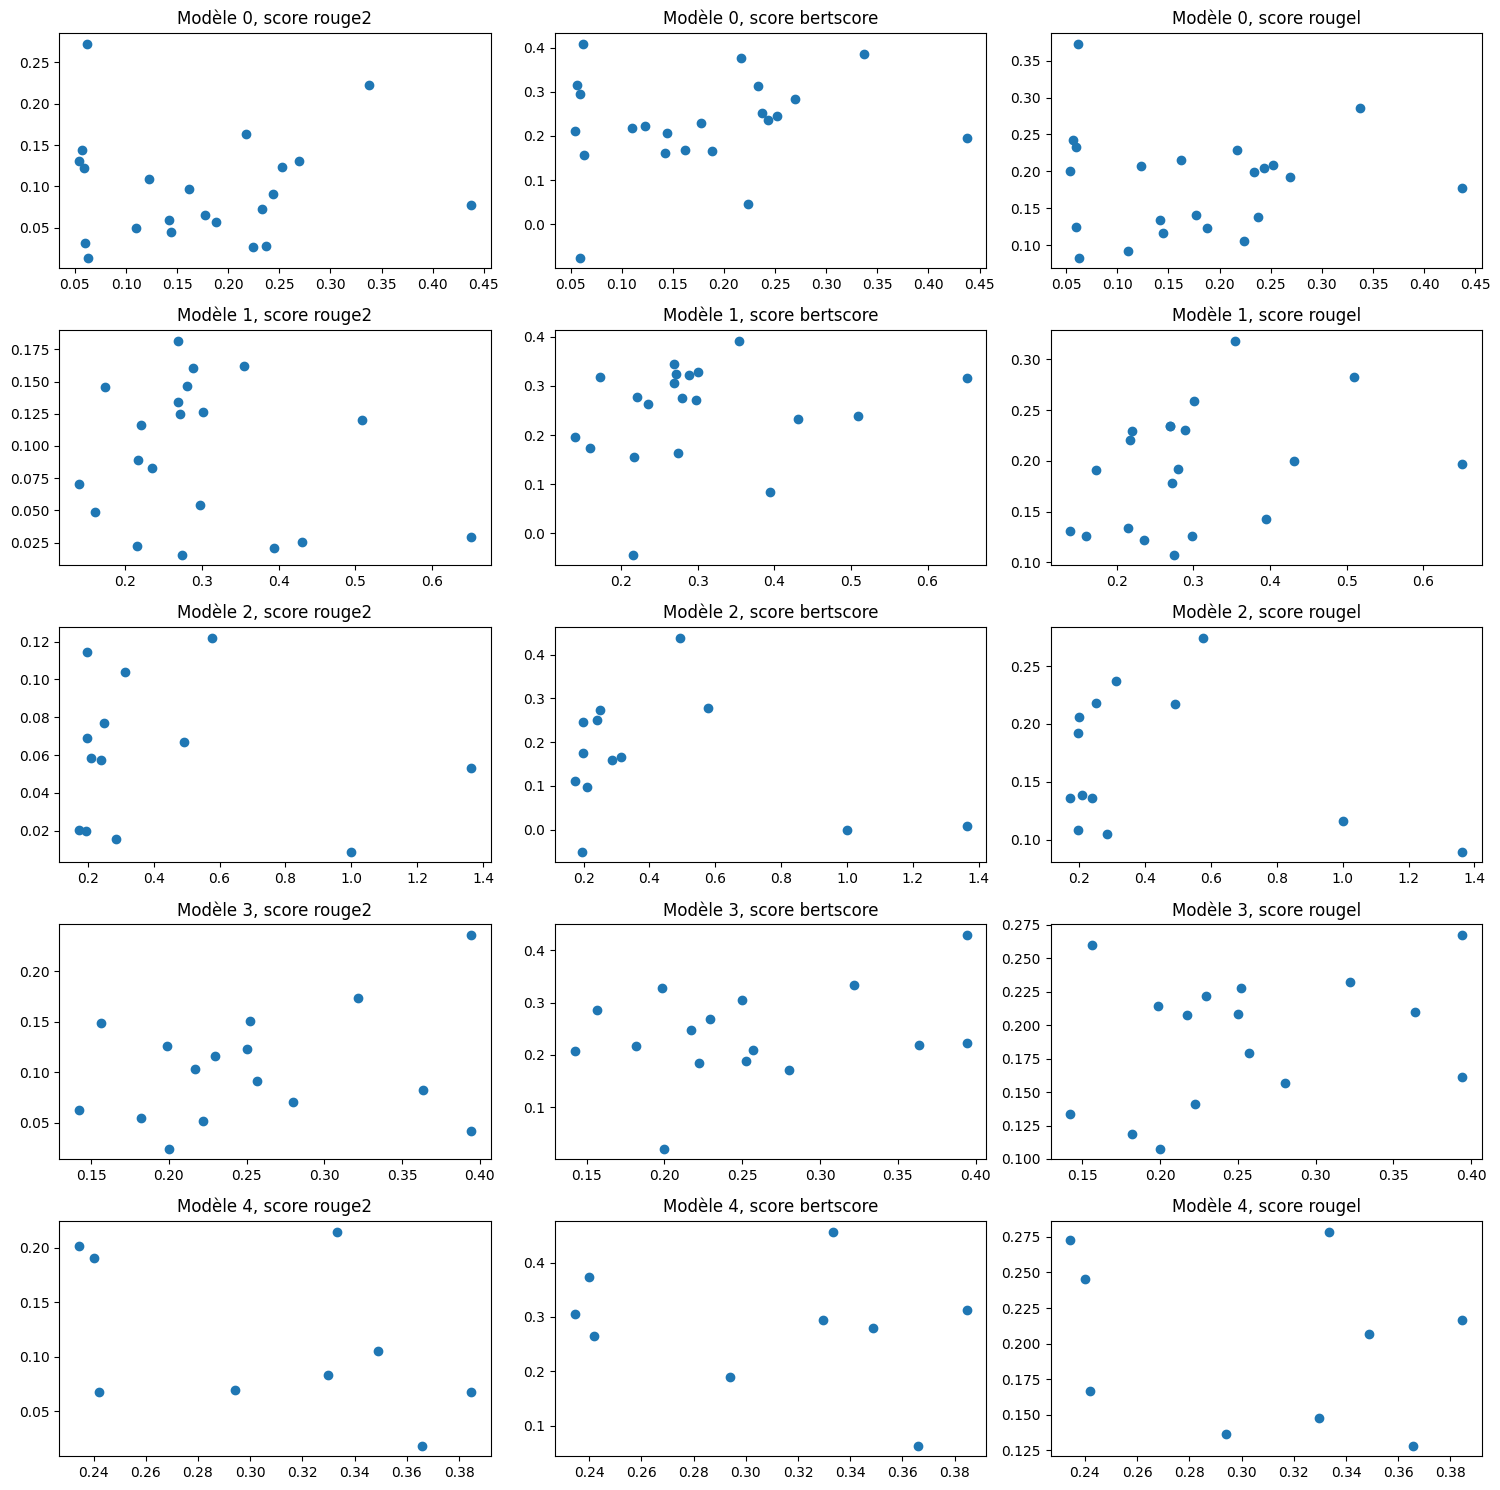

In [39]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))  # 1 row, 3 columns

i=0
j=0
for nb_batch in batches:
    path_scores_file = "results/" + nb_batch + "/scores.csv" # nb_batch
    # Extract english data
    df = pd.read_csv(path_scores_file)
    df = df[df["consistency"]==1]
    df = df[df["input_language"]==1]
    tab = []

    for input_path in df["input_path"]:
        file = open("results/" + nb_batch + "/" + input_path, 'r', encoding='utf-8')
        data = json.load(file)
        file.close()
        file = open(data["input_path"], 'r', encoding='utf-8')
        data = json.load(file)
        file.close()
        s = 0
        for summary in data["summaries"]:
            s += int(summary["nb_words_en"])
        s /= len(data["summaries"])
        tab.append(s)

    df["nb_words_gold"] = s
    df["rate"] = df["nb_words_gold"]/df["nb_words_generated"]
    for score in scores:
        X0 = df[df["rate"] < 3]
        X1 = X0[X0["rate"] > -3]
        X = X1["rate"]
        Y = X1[score]

        axes[i][j].scatter(X, Y)
        axes[i][j].set_title("Modèle " + str(i) + ", score " + score)
        if j==2:
            j=0
            i+=1
        else:
            j+=1

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
a = [[0, 1], [5,6]]
b = [[1,2], [1,2]]

dfa = pd.DataFrame(a, columns=['ID', 'Name'])
dfb = pd.DataFrame(b, columns=['ID', 'Name'])
df = dfa/dfb
df.mean()

ID      2.50
Name    1.75
dtype: float64

In [9]:
batches = {'0', '1', '2', '3', '4'}

for nb_batch in batches:
    df = pd.read_csv("results/" + nb_batch + "/scores.csv")
    dataset_column = []
    for i in range(len(df)):
        row = df.iloc[i]
        dataset_column.append(identify_datasets(row["input_path"]))
    df["dataset"] = dataset_column
    df.to_csv("scores" + nb_batch + ".csv", encoding="utf-8")


In [11]:
df = pd.read_csv('results/0/scores.csv')
print(df.iloc[24])

for i in range(len(df)):
        row = df.iloc[i]
        
        consistent_count[identify_datasets(row["input_path"])] +=1
    for corpus in consistent_count:
        print(" - " + corpus + " - Nombre de réponses cohérentes: " + str(consistent_count[corpus]) + "/5")
    print()
    # Metrics
    print("Moyennes des métriques sur le corpus entier")
    
    results = {"total":{}, "consistent_total":{}, "consistent_per_corpus":{corpus:{} for corpus in corpora}, "per_corpus":{corpus:{} for corpus in corpora}}
    for score in scores:
        results["total"][score] = df[score].mean()
        results["consistent_total"][score] = consistent_df[score].mean()
        print(" - " + score + " moyen: " + str(results["total"][score]))
    print()
    # Per corpus
    print("--- Par dataset ---")
    consistent_per_corpus = {corpus:consistent_df[identify_datasets(consistent_df["input_path"]) == corpus] for corpus in corpora}
    df_per_corpus = {corpus:df[identify_datasets(df["input_path"]) == corpus] for corpus in corpora}
    print("Moyennes des métriques par dataset entier")

    for corpus in corpora:
        print(" - " + corpus + ":")
        for score in scores:
            results["per_corpus"][corpus][score] = df_per_corpus[corpus][score].mean()
            results["consistent_per_corpus"][corpus][score] = consistent_per_corpus[corpus][score].mean()
            print("   * " + score + ": " + str(results["per_corpus"][corpus][score]))
            
    print("Moyennes des métriques par dataset pour les réponses cohérentes")
    
    # Et c'est normal, le header de finetuning est en anglais... Les tâches de finetuning ne sont pas multilingues !
    # Du coup, problème lors du calcul des scores: calculs sur du gold fr et du generated en. De plus, problème plus général sur les métriques, un bertscore français est différent d'un bertscore anglais, pas comparable et la moyenne du rouge score entre deux textes randoms en langue anglais et française est probablement différente... Limites de ces mesures. Justifie l'analyse qualitative.

Unnamed: 0                               24
input_path            samsum_3_text_en.json
rouge2                             0.236364
rougel                             0.267857
bertscore                          0.430125
nb_words_input                           92
nb_words_gold                            41
nb_words_generated                       71
success                                   1
over_context                              0
output_language                           1
input_language                            1
consistency                               1
description                              -1
Name: 24, dtype: object


In [ ]:
rouge2_en_fr = consistent_df_en_fr['rouge2'].mean()
    rougel_en_fr = consistent_df_en_fr['rougel'].mean()
    bert_en_fr = consistent_df_en_fr['bertscore'].mean()

    rouge2_fr_fr = consistent_df_fr_fr['rouge2'].mean()
    rougel_fr_fr = consistent_df_fr_fr['rougel'].mean()
    bert_fr_fr = consistent_df_fr_fr['bertscore'].mean()

    rouge2_en_en = consistent_df_en_en['rouge2'].mean()
    rougel_en_en = consistent_df_en_en['rougel'].mean()
    bert_en_en = consistent_df_en_en['bertscore'].mean()

    print("Moyennes questions françaises, réponses françaises (" + str(len(consistent_df_fr_fr)) + " échantillons):")
    print("Rouge 2: " + str(rouge2_fr_fr) + " ---- Rouge L: " + str(rougel_fr_fr) + " ---- BertScore: " + str(bert_fr_fr))
    print()
    print("Moyennes questions anglaises, réponses anglaises (" + str(len(consistent_df_en_en)) + " échantillons):")
    print("Rouge 2: " + str(rouge2_en_en) + " ---- Rouge L: " + str(rougel_en_en) + " ---- BertScore: " + str(bert_en_en))
    print()
    print("Moyennes questions françaises, réponses anglaises (" + str(len(consistent_df_en_fr)) + " échantillons):")
    print("Rouge 2: " + str(rouge2_en_fr) + " ---- Rouge L: " + str(rougel_en_fr) + " ---- BertScore: " + str(bert_en_fr))
    print()

    consistent_df_en_en["compression_rate"] = consistent_df_en_en["nb_words_generated"] / consistent_df_en_en["nb_words_input"]
    consistent_df_en_fr["compression_rate"] = consistent_df_en_fr["nb_words_generated"] / consistent_df_en_fr["nb_words_input"]
    consistent_df_fr_fr["compression_rate"] = consistent_df_fr_fr["nb_words_generated"] / consistent_df_fr_fr["nb_words_input"]
    compression_rate_en_en = consistent_df_en_en["compression_rate"].mean()
    compression_rate_en_fr = consistent_df_en_fr["compression_rate"].mean()
    compression_rate_fr_fr = consistent_df_fr_fr["compression_rate"].mean()

    print("Taux de compression questions anglaises réponses anglaises: " + str(compression_rate_en_en))
    print("Taux de compression questions françaises réponses anglaises: " + str(compression_rate_en_fr))
    print("Taux de compression questions françaises réponses françaises: " + str(compression_rate_fr_fr))

    print()
    print()
    # Grosse tendance à écrire en anglais